## Loss Functions

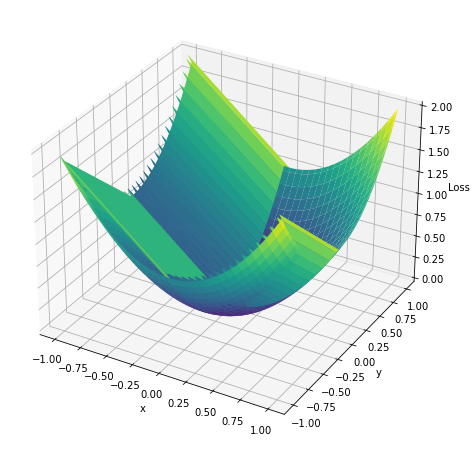

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z = x**2 + y**2


fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
# ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)
surf = ax.plot_surface(x, y, z, label = "Loss surface", cmap = 'viridis', edgecolor = 'none')
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')
# fig.savefig('chapter5_plot1.pdf')

plt.show()

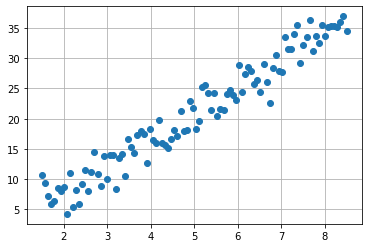

In [5]:
x = np.linspace(1.5, 8.5, num = 100)
y = 4.2*x + np.random.normal(size = 100, loc = 0, scale = 2)

plt.plot(x, y, 'o')
plt.grid()
plt.show()

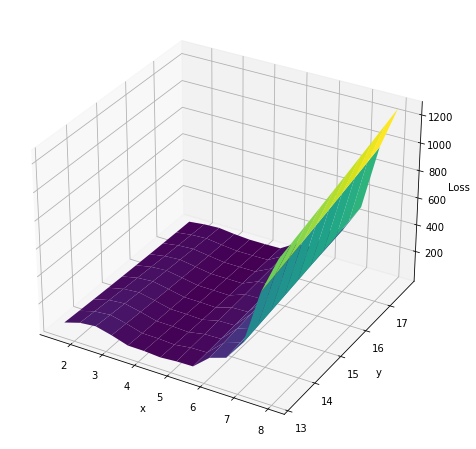

In [37]:
X = np.linspace(1.5, 8.5, num = 14)
Y = 16 + 4.2*X + np.random.normal(size = 14, loc = 0, scale = 2)

x = np.arange(1.5, 8.5, 0.5)
y = np.arange(13.2, 18, 0.5)
x, y = np.meshgrid(x, y)

# # Compute z to make the pringle surface.
z_pred = y + x*X
loss = np.power((z_pred - Y), 2)

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_surface(x, y, loss, label = "Loss surface", cmap = 'viridis', edgecolor = 'none')
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

# # fig.savefig('chapter5_plot2.pdf')

plt.show()

In [25]:
z_pred

array([[15.45      , 17.27692308, 19.64230769, 22.54615385, 25.98846154,
        29.96923077, 34.48846154, 39.54615385, 45.14230769, 51.27692308,
        57.95      , 65.16153846, 72.91153846, 81.2       ],
       [15.95      , 17.77692308, 20.14230769, 23.04615385, 26.48846154,
        30.46923077, 34.98846154, 40.04615385, 45.64230769, 51.77692308,
        58.45      , 65.66153846, 73.41153846, 81.7       ],
       [16.45      , 18.27692308, 20.64230769, 23.54615385, 26.98846154,
        30.96923077, 35.48846154, 40.54615385, 46.14230769, 52.27692308,
        58.95      , 66.16153846, 73.91153846, 82.2       ],
       [16.95      , 18.77692308, 21.14230769, 24.04615385, 27.48846154,
        31.46923077, 35.98846154, 41.04615385, 46.64230769, 52.77692308,
        59.45      , 66.66153846, 74.41153846, 82.7       ],
       [17.45      , 19.27692308, 21.64230769, 24.54615385, 27.98846154,
        31.96923077, 36.48846154, 41.54615385, 47.14230769, 53.27692308,
        59.95      , 67.16

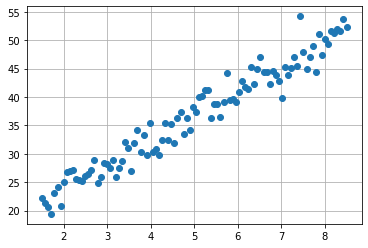

In [10]:
plt.plot(X, Y, 'o')
plt.grid()
plt.show()